# Customizing Ticks

Matplotlib's default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This chapter will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Before we go into examples, however, let's talk a bit more about the object hierarchy of Matplotlib plots.
Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the `Figure` is the bounding box within which plot elements appear.
Each Matplotlib object can also act as a container of subobjects: for example, each `Figure` can contain one or more `Axes` objects, each of which in turn contains other objects representing plot contents.

The tickmarks are no exception. Each axes has attributes `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

## Major and Minor Ticks

Within each axes, there is the concept of a *major* tickmark, and a *minor* tickmark. As the names imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots (see the following figure):

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

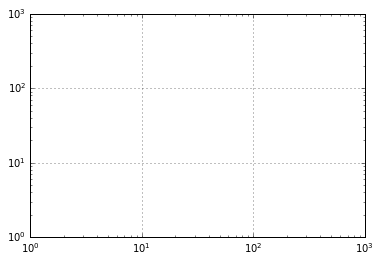

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);

In this chart each major tick shows a large tickmark, label, and gridline, while each minor tick shows a smaller tickmark with no label or gridline.

These tick properties—locations and labels, that is—can be customized by setting the `formatter` and `locator` objects of each axis. Let's examine these for the x-axis of the just-shown plot:

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a `LogLocator` (which makes sense for a logarithmic plot). Minor ticks, though, have their labels formatted by a `NullFormatter`: this says that no labels will be shown.

We'll now look at a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or labels.
This can be done using `plt.NullLocator` and `plt.NullFormatter`, as shown here (see the following figure):

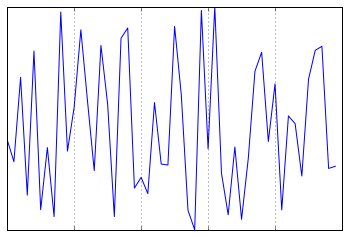

In [5]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

We've removed the labels (but kept the ticks/gridlines) from the x-axis, and removed the ticks (and thus the labels and gridlines as well) from the y-axis.
Having no ticks at all can be useful in many situations—for example, when you want to show a grid of images.
For instance, consider the following figure, which includes images of different faces, an example often used in supervised machine learning problems (see, for example, [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)):

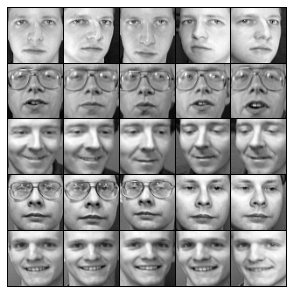

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')

Each image is shown in its own axes, and we've set the tick locators to null because the tick values (pixel numbers in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels.
We can see this in the plot grid shown here (see the following figure):

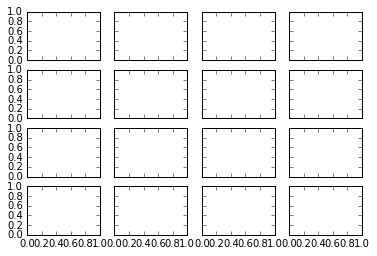

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x-axis ticks, the numbers nearly overlap, making them quite difficult to decipher.
One way to adjust this is with `plt.MaxNLocator`, which allows us to specify the maximum number of ticks that will be displayed.
Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations (see the following figure):

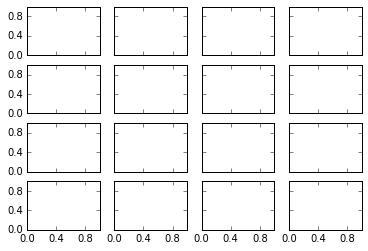

In [8]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly spaced ticks, you might also use `plt.MultipleLocator`, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot to be desired: it works well as a broad default, but sometimes you'd like to do something different.
Consider this plot of a sine and a cosine curve (see the following figure):

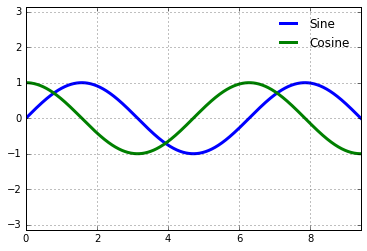

In [9]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple of changes we might like to make here. First, it's more natural for this data to space the ticks and gridlines in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the number we provide. For good measure, we'll add both major and minor ticks in multiples of $\pi/2$ and $\pi/4$ (see the following figure):

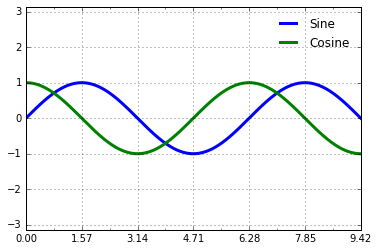

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of $\pi$, but the decimal representation does not immediately convey this.
To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use `plt.FuncFormatter`, which accepts a user-defined function giving fine-grained control over the tick outputs (see the following figure):

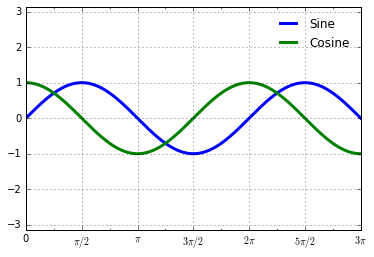

In [11]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we've made use of Matplotlib's LaTeX support, specified by enclosing the string within dollar signs. This is very convenient for display of mathematical symbols and formulae: in this case, `"$\pi$"` is rendered as the Greek character $\pi$.

## Summary of Formatters and Locators

We've seen a couple of the available formatters and locators; I'll conclude this chapter by briefly listing all of the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentation.
Each of the following is available in the `plt` namespace:

Locator class      | Description
-------------------|-------------
`NullLocator`      | No ticks
`FixedLocator`     | Tick locations are fixed
`IndexLocator`     | Locator for index plots (e.g., where `x = range(len(y)))`
`LinearLocator`    | Evenly spaced ticks from min to max
`LogLocator`       | Logarithmically spaced ticks from min to max
`MultipleLocator`  | Ticks and range are a multiple of base
`MaxNLocator`      | Finds up to a max number of ticks at nice locations
`AutoLocator`      | (Default) `MaxNLocator` with simple defaults
`AutoMinorLocator` | Locator for minor ticks

Formatter class     | Description
--------------------|---------------
`NullFormatter`     | No labels on the ticks
`IndexFormatter`    | Set the strings from a list of labels
`FixedFormatter`    | Set the strings manually for the labels
`FuncFormatter`     | User-defined function sets the labels
`FormatStrFormatter`| Use a format string for each value
`ScalarFormatter`   | Default formatter for scalar values
`LogFormatter`      | Default formatter for log axes

We'll see further examples of these throughout the remainder of the book.